### Données :

Données issues de l'ADEME (3 premiers jeux de données) et de AVATAR (information sur le traffic routiers)
    <ul>
        <li>Inventaire de gaz à effet de serre territorialisé</li>
        <li>Bilan GES</li>
        <li>ALDO - flux 1 - flux total et surfaces converties</li>
        <li>Données AVATAR</li>
    </ul>

In [12]:
import pandas as pd
import numpy as np


In [10]:
inventaire_ges = pd.read_csv("https://data.ademe.fr/data-fair/api/v1/datasets/igt-pouvoir-de-rechauffement-global/full")
#bilan_ges = pd.read_csv("https://data.ademe.fr/data-fair/api/v1/datasets/bilan-ges/full", sep =";")
#aldo_f1 =pd.read_csv("https://data.ademe.fr/data-fair/api/v1/datasets/aldo-flux-total-et-surfaces-converties/full")
# avatar essayer API 

In [3]:
inventaire_ges.sample(5)

,INSEE commune,Commune,Agriculture,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Energie,Industrie hors-énergie,Résidentiel,Routier,Tertiaire,lat,lon
34674,88449,SAVIGNY,2509.927160,NaN,NaN,216.738896,25.919652,11.772789,34.556067,113.702640,818.971287,93.792816,48.353770,6.218961
34263,88016,ATTIGNY,1296.422311,NaN,NaN,215.540989,33.457510,2.354558,6.911213,147.414755,846.580967,121.069298,48.064188,6.034742
28419,70423,PREIGNEY,19.288967,NaN,NaN,160.006437,14.943473,2.354558,6.911213,66.624856,403.904677,54.074430,47.762634,5.774433
23103,59631,WALINCOURT-SELVIGNY,2509.718628,NaN,NaN,1189.129596,17.323200,127.146118,373.205521,3759.736950,1719.632183,1003.487423,50.068208,3.334886
16564,43151,PINOLS,4245.792128,NaN,NaN,327.447402,28.432272,4.709115,13.822427,141.759071,784.531611,102.884977,45.051286,3.412820


In [4]:
bilan_ges.sample(5)

,Id,"Méthode BEGES (V4,V5)",Date de publication,Type de structure,Type de collectivité,Raison sociale,SIREN principal,APE(NAF) associé,Libellé,Nombre de salariés/d'agents,...,Incertitudes,Sources,Recalcul,Siret,Comparaison avec le précédent bilan,Lien URL vers le rapport complet du BEGES,Responsable du suivi,Fonction,Téléphone,Courriel
1213,9386c3a0-b1cd-11ed-8fce-005056b7acd1,v4,01/09/2017,Établissement public,NaN,CENTRE INTERCOMMUNAL D'ACTION SOCIALE DU MARSAN,264004342,8899B,Action sociale sans hébergement n.c.a.,Entre 250 et 499,...,NaN,NaN,NaN,NaN,NaN,NaN,[Masqué],[Masqué],[Masqué],[Masqué]
6876,f8ee8b1d-6965-4c5d-be70-0ed1000af884,v5,12/05/2024,Entreprise,NaN,PLACOPLATRE,729800706,7010Z,Activités des sièges sociaux,Entre 1 000 et 1 999,...,"L&#039;incertitude sur les émissions estimées,...",Sources de gaz à effet de serre associées à l&...,"Le bilan de référence, portant sur l&#039;anné...",NaN,Comparaison au bilan 2018 : Sur le périmètre d...,NaN,[Masqué],[Masqué],[Masqué],[Masqué]
4947,93c475fd-b1cd-11ed-8fce-005056b7acd1,v4,26/12/2022,État,NaN,PREFECTURE DE LA NIEVRE,175800010,NaN,NaN,NaN,...,Les incertitudes sur les données à collecter o...,Tableaux nuaGES\n,NaN,175800010 00019\r\n,NaN,NaN,MALLEMONT Jocelyne,Contrôleuse de gestion - Référente qualité,03.86.60.70.73,jocelyne.mallemont@nievre.gouv.fr
5315,b965d1c0-066f-4191-819a-14d1d8250cac,v5,19/05/2023,État,NaN,DDSP 88,178801510,8424Z,Activités d'ordre public et de sécurité,Entre 200 et 249,...,Calcul des incertitudesPour toutes réponses ju...,"Récolte des données- Bâtiments, surfaces, anné...",BEGES 2022 effectué avec le logiciel NUAGESLe ...,Siret de la DDSP17880151000037Ciat Remiremont1...,diminution -23%La diminution attendu sur la pé...,NaN,Sébastien DHOTE,Responsable développement durable et BEGES,07 72 30 90 07,sebastien.dhote@interieur.gouv.fr
559,937ad133-b1cd-11ed-8fce-005056b7acd1,v4,01/09/2016,Collectivité territoriale (dont EPCI),Départements,DEPARTEMENT DE LA CORSE DU SUD,222000028,NaN,NaN,Entre 1 000 et 1 999,...,NaN,NaN,NaN,NaN,NaN,NaN,[Masqué],[Masqué],[Masqué],[Masqué]


In [5]:
aldo_f1.sample(5)

,insee,nom,epci,departement,region,zpc,inter_region,groupe_ser,greco,rad_13,...,forêt peupleraie_vers_vergers_surface_ha_an-1,forêt peupleraie_vers_vergers_tCO2e_an-1,forêt peupleraie_vers_vignes_surface_ha_an-1,forêt peupleraie_vers_vignes_tCO2e_an-1,forêt peupleraie_vers_sols artificiels arbustifs_surface_ha_an-1,forêt peupleraie_vers_sols artificiels arbustifs_tCO2e_an-1,forêt peupleraie_vers_sols artificiels imperméabilisés_surface_ha_an-1,forêt peupleraie_vers_sols artificiels imperméabilisés_tCO2e_an-1,forêt peupleraie_vers_sols artificiels arborés et buissonants_surface_ha_an-1,forêt peupleraie_vers_sols artificiels arborés et buissonants_tCO2e_an-1
1042,65042,Asté,246500482.0,65,76,2_3,SUD-EST,I1,I,OCC,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
34242,40278,Saint-Paul-en-Born,244000543.0,40,75,1_1,SUD-OUEST,F2,F,NAQ,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
11104,27315,Harquency,200072312.0,27,28,3_1,NORD-OUEST,B3,B,NOR,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
27012,09012,Appy,200066363.0,09,76,2_3,SUD-EST,I1,I,OCC,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
34849,60109,Brombos,246000848.0,60,32,2_3,NORD-OUEST,B1,B,HDF,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN


In [10]:
inventaire_ges.columns

Index(['INSEE commune', 'Commune', 'Agriculture', 'Autres transports',
       'Autres transports international', 'CO2 biomasse hors-total', 'Déchets',
       'Energie', 'Industrie hors-énergie', 'Résidentiel', 'Routier',
       'Tertiaire', 'lat', 'lon'],
      dtype='object')

In [11]:
bilan_ges.columns

Index(['Id', 'Méthode BEGES (V4,V5)', 'Date de publication',
       'Type de structure', 'Type de collectivité', 'Raison sociale',
       'SIREN principal', 'APE(NAF) associé', 'Libellé',
       'Nombre de salariés/d'agents', 'Population', 'Région',
       'Code département', 'Département', 'Structure obligée',
       'Mode de consolidation', 'Année de reporting', 'Assujetti DPEF/PCAET ?',
       'Lien DPEF/PCAET', 'Aide diag décarbon'action',
       'Seuil d'importance retenu (%)', 'Niveau d'influence',
       'Importance stratégique et vulnérabilités',
       'Lignes directrices spécifiques au secteur', 'Sous-traitance',
       'Engagement du personnel',
       'Justification des postes d'émissions indirectes écartés',
       'Emissions publication P1.1', 'Emissions publication P1.2',
       'Emissions publication P1.3', 'Emissions publication P1.4',
       'Emissions publication P1.5', 'Emissions publication P2.1',
       'Emissions publication P2.2', 'Emissions publication P3.1',
 

In [12]:
aldo_f1.columns

Index(['insee', 'nom', 'epci', 'departement', 'region', 'zpc', 'inter_region',
       'groupe_ser', 'greco', 'rad_13',
       ...
       'forêt peupleraie_vers_vergers_surface_ha_an-1',
       'forêt peupleraie_vers_vergers_tCO2e_an-1',
       'forêt peupleraie_vers_vignes_surface_ha_an-1',
       'forêt peupleraie_vers_vignes_tCO2e_an-1',
       'forêt peupleraie_vers_sols artificiels arbustifs_surface_ha_an-1',
       'forêt peupleraie_vers_sols artificiels arbustifs_tCO2e_an-1',
       'forêt peupleraie_vers_sols artificiels imperméabilisés_surface_ha_an-1',
       'forêt peupleraie_vers_sols artificiels imperméabilisés_tCO2e_an-1',
       'forêt peupleraie_vers_sols artificiels arborés et buissonants_surface_ha_an-1',
       'forêt peupleraie_vers_sols artificiels arborés et buissonants_tCO2e_an-1'],
      dtype='object', length=353)

In [13]:

inventaire_ges['total'] = inventaire_ges.drop(['INSEE commune', 'Commune','lat','lon'], axis = 1).sum(numeric_only=True, axis = 1)
inventaire_ges['total'] = inventaire_ges['total'].fillna(inventaire_ges['total'].mean(numeric_only=True, axis = 0))
inventaire_ges['log_total'] = np.log(inventaire_ges['total'])
inventaire_ges.sample(10)

,INSEE commune,Commune,Agriculture,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Energie,Industrie hors-énergie,Résidentiel,Routier,Tertiaire,lat,lon,total,log_total
8745,25094,BRETIGNEY-NOTRE-DAME,642.500037,NaN,NaN,143.130287,43.111730,NaN,NaN,70.152943,245.404117,53.117360,47.311981,6.302191,2394.832949,7.781069
23503,60367,LOCONVILLE,1389.481502,NaN,NaN,277.170218,47.607525,2.354558,6.911213,144.118212,431.213502,172.272519,49.255101,1.917734,4942.258498,8.505578
12330,32127,ESTANG,2024.243633,NaN,NaN,557.024414,84.635600,30.609251,89.845774,360.193572,1072.169043,306.262256,43.866322,-0.109233,9049.967083,9.110516
24209,61471,SERIGNY,2822.927246,NaN,NaN,489.968107,52.103791,NaN,NaN,572.127148,2869.310594,357.983703,48.376173,0.591466,14328.841177,9.570030
33450,84103,RUSTREL,1021.475877,NaN,NaN,341.364076,96.934210,7.063673,20.733640,329.291655,1233.987815,350.765990,43.923756,5.484426,6803.233872,8.825153
6877,21087,BLIGNY-SUR-OUCHE,1433.654139,NaN,NaN,1432.704764,112.009926,30.609251,89.845774,455.669263,11303.143214,405.318954,47.105615,4.669474,30525.910569,10.326331
20947,55296,LISLE-EN-RIGAULT,1548.981782,NaN,NaN,345.259148,67.311750,2.354558,6.911213,832.753198,556.831215,243.574200,48.717286,5.045902,7207.954128,8.882940
2429,08032,AUSSONCE,2682.414510,NaN,NaN,294.164354,26.580868,2.354558,6.911213,99.377141,508.298147,96.185490,49.349807,4.322314,7432.572562,8.913627
25894,64298,LACARRY-ARHAN-CHARRITTE-DE-HAUT,1288.007553,NaN,NaN,92.074624,45.095377,2.354558,6.911213,40.989611,50.446972,60.295382,43.084271,-0.924548,3172.350578,8.062228
29340,72210,MONTREUIL-LE-HENRI,3299.284093,NaN,NaN,184.303499,38.218263,2.354558,6.911213,134.814162,551.256331,138.296550,47.866513,0.564061,8710.877338,9.072328


In [25]:
pip install scikit-learn


                                              0.0/11.0 MB ? eta -:--:--
                                              0.1/11.0 MB 1.7 MB/s eta 0:00:07
                                              0.2/11.0 MB 2.2 MB/s eta 0:00:05
     -                                        0.3/11.0 MB 2.7 MB/s eta 0:00:04
     -                                        0.5/11.0 MB 2.8 MB/s eta 0:00:04
     --                                       0.7/11.0 MB 3.2 MB/s eta 0:00:04
     ---                                      0.9/11.0 MB 3.3 MB/s eta 0:00:04
     ---                                      1.1/11.0 MB 3.2 MB/s eta 0:00:04
     ----                                     1.3/11.0 MB 3.4 MB/s eta 0:00:03
     -----                                    1.5/11.0 MB 3.5 MB/s eta 0:00:03
     -----                                    1.6/11.0 MB 3.3 MB/s eta 0:00:03
     ------                                   1.8/11.0 MB 3.4 MB/s eta 0:00:03
     -------                                  2.0/11.0 MB 3


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Projection géographique avec interpolation continue

<Axes: ylabel='Density'>

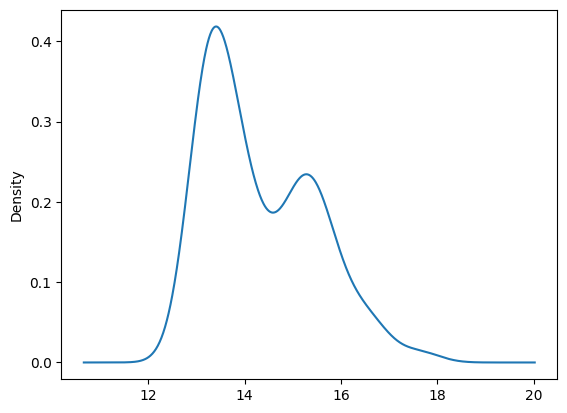

In [131]:
df = inventaire_ges[['lat', 'lon', 'log_total', 'total']]

gros_gros_pollueurs = (df['log_total']>15) #40 communes
gros_pollueurs = (df['log_total']>13)  &  (df['log_total']<=15) #530 communes
moyens_pollueurs = (df['log_total']>10)  &  (df['log_total']<=13) #15 680 communes
petits_pollueurs = (df['log_total']>9)  &  (df['log_total']<=10) #13 049 communes
petits_petits_pollueurs = (df['log_total']<=9) #6 488 communes

# Au total on compte 35 787 communes
# On souhaite avoir 500 points de mesure, on exclue d'office les très petits pollueurs 
# 500 - 40 = 460
# 460 - 100 = 360
df_equilibre = pd.concat(
    [
    df[gros_gros_pollueurs],
    df[gros_pollueurs].sample(100),
    #df[moyens_pollueurs].sample(160),
    #df[petits_pollueurs].sample(100)
    ])
df_equilibre['log_total'].plot(kind = 'density')

c:\Users\antoi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


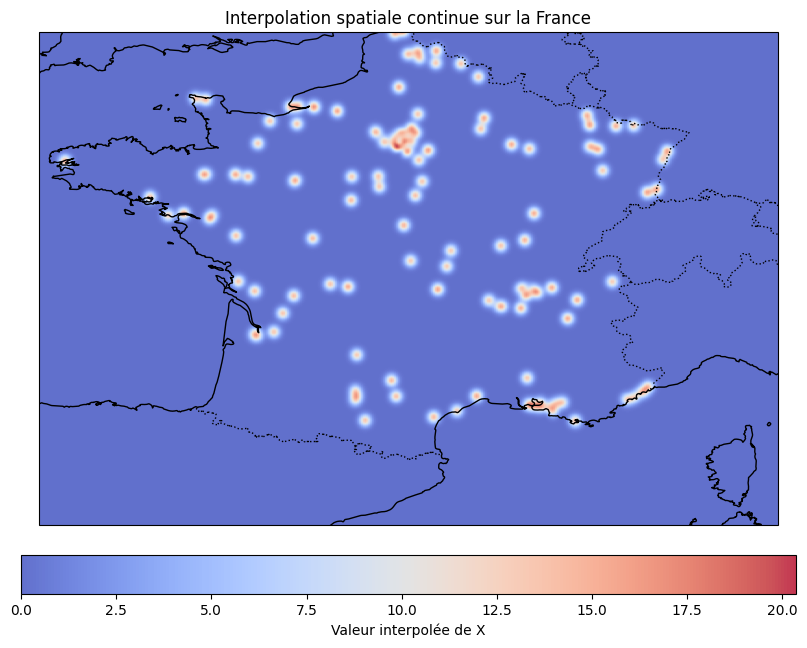

In [144]:
#Un jeu de données un peu plus important
import pandas as pd

''''
# Données simulées : longitude, latitude et variable X
data = {
    'longitude': [2.3522, 3.8772, 5.3698, -1.556, 1.4437, 7.2620, 4.8357, -0.5792,
                  6.1834, -4.4947, 4.3601, 3.0833, 1.086, -0.7393, 9.4511],
    'latitude': [48.8566, 43.6117, 43.2965, 47.2181, 43.6047, 43.7102, 45.7640, 44.8378,
                 49.1193, 48.3904, 45.775, 50.6292, 49.496, 48.0731, 42.6966],
    'X': [10, 20, 30, 15, 25, 35, 20, 30, 40, 5, 12, 22, 18, 8, 50]  # Variable d'intérêt
}

df = pd.DataFrame(data)

'''
#Paramètres
#nb_echantillon = 500
l_scale = 0.12
#Problème de méthodologie, il y a très peu de gros pollueurs et beaucoup de petits
# On n'a donc jamais une image fiable
# Un meilleure manière de sélectionner l'échantillon serait:
# --> Prendre les plus gros pollueurs
# --> Prendre prendre moins de villes peu polluantes de manière aléatoire

#df = inventaire_ges[['lat', 'lon', 'log_total']].fillna(1).sample(nb_echantillon)
df = df_equilibre
df = df.rename(columns={'lat': 'latitude','lon': 'longitude','log_total': 'X', 'total':'XX'})

import numpy as np

# Définir les limites de la France
lon_min, lon_max = -5, 10  # approx. France
lat_min, lat_max = 41, 51
resolution = 400  # Nombre de points dans chaque dimension

# Créer une grille de points
grid_lon, grid_lat = np.meshgrid(
    np.linspace(lon_min, lon_max, resolution),
    np.linspace(lat_min, lat_max, resolution)
)
grid_points = np.c_[grid_lon.ravel(), grid_lat.ravel()]

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Modèle Gaussian Process avec kernel RBF
kernel = RBF(length_scale=l_scale) #Il s'agit ici de paramètre le plus important du modèle. Plus on a de données plus il peut être petit
gp = GaussianProcessRegressor(kernel=kernel)

# Ajuster le modèle sur les points
gp.fit(df[['longitude', 'latitude']], df['X'])

# Prédire sur la grille
grid_X = gp.predict(grid_points)
grid_X = grid_X.reshape(grid_lon.shape)

#Il s'agit ici du meilleur modèle

# Création de la figure avec projection géographique
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Ajout des frontières et côtes
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)

# Afficher le dégradé continu
pcm = ax.imshow(
    grid_X, extent=(lon_min, lon_max, lat_min, lat_max),
    origin='lower', cmap='coolwarm', alpha=0.8, transform=ccrs.PlateCarree()
)

# Ajouter une barre de couleur
cbar = plt.colorbar(pcm, ax=ax, orientation='horizontal', pad=0.05, label='Valeur interpolée de X')

# Afficher les points originaux
#ax.scatter(df['longitude'], df['latitude'],c = df['X'], cmap='coolwarm', edgecolor='k', s=10, transform=ccrs.PlateCarree())

# Titre
plt.title("Interpolation spatiale continue sur la France")
plt.show()

#Remarque : pour ajuster le paramètre 'length scale', on peut utiliser la couleur du fonds:
#Si le fonds est bleu (ou valeur faible), le paramètre est trop bas
#Si le fonds est rose (ou valeur haute), le paramètre est trop haut
#Si on voit apparaître de la diffusion, alors la valeur paramètre est relativement bonne


c:\Users\antoi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\antoi\AppData\Local\Temp\ipykernel_12460\1287399111.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


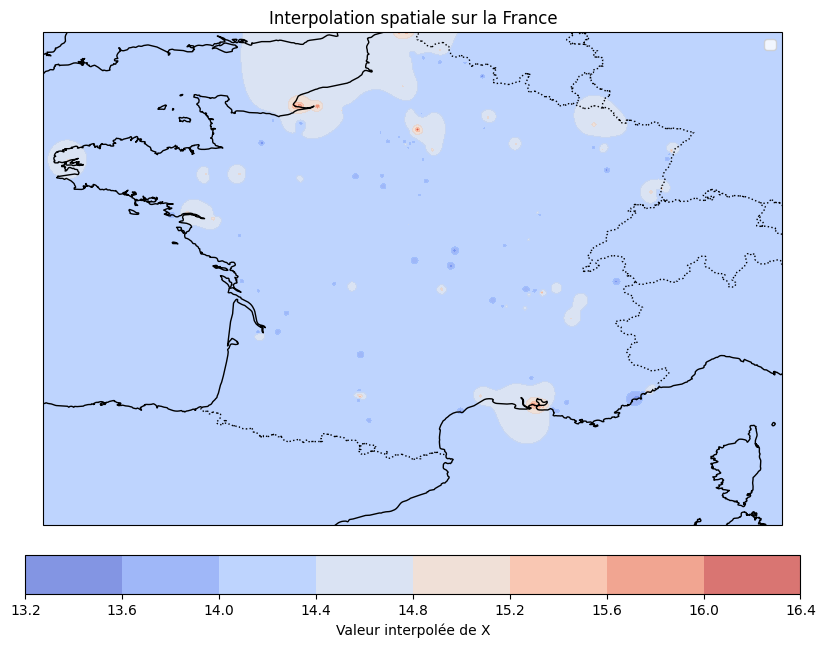

In [161]:
#On peut essayer de faire la même chose avec KNN
from sklearn.neighbors import KNeighborsRegressor

# Modèle KNN pour interpolation
knn = KNeighborsRegressor(n_neighbors=len(df), weights='distance')  # Pondération par la distance
knn.fit(df[['longitude', 'latitude']], df['X'])

# Prédiction sur la grille
grid_X = knn.predict(grid_points)
grid_X = grid_X.reshape(grid_lon.shape)

## Identique à précédent
# Créer une figure et définir une projection
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Ajouter les frontières, côtes et autres caractéristiques
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Afficher la carte interpolée
cs = ax.contourf(grid_lon, grid_lat, grid_X, cmap='coolwarm', alpha=0.7, transform=ccrs.PlateCarree())

# Ajouter une barre de couleur
cbar = plt.colorbar(cs, ax=ax, orientation='horizontal', pad=0.05, label='Valeur interpolée de X')

# Afficher les points originaux
#ax.scatter(df['longitude'], df['latitude'], c=df['X'], cmap='coolwarm', edgecolor='k', marker='o', s=100, label='Données originales', transform=ccrs.PlateCarree())

# Titre et légende
plt.title("Interpolation spatiale sur la France")
plt.legend()
plt.show()

c:\Users\antoi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(
C:\Users\antoi\AppData\Local\Temp\ipykernel_12460\3572182679.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


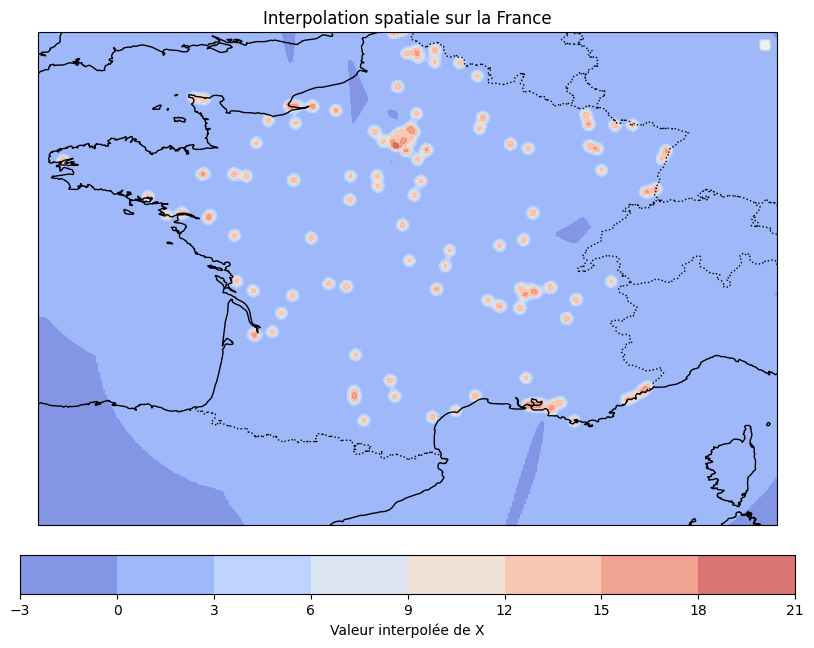

In [155]:
# Modèle Gaussian Process avec kernel RBF
kernel = RBF(length_scale=l_scale)
gp = GaussianProcessRegressor(kernel=kernel)

# Ajuster le modèle sur les points
gp.fit(df[['longitude', 'latitude']], df['X'])

# Prédire sur la grille
grid_X = gp.predict(grid_points)
grid_X = grid_X.reshape(grid_lon.shape)

# Créer une figure et définir une projection
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Ajouter les frontières, côtes et autres caractéristiques
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Afficher la carte interpolée
cs = ax.contourf(grid_lon, grid_lat, grid_X, cmap='coolwarm', alpha=0.7, transform=ccrs.PlateCarree())

# Ajouter une barre de couleur
cbar = plt.colorbar(cs, ax=ax, orientation='horizontal', pad=0.05, label='Valeur interpolée de X')

# Afficher les points originaux
#ax.scatter(df['longitude'], df['latitude'], c=df['X'], cmap='coolwarm', edgecolor='k', marker='o', s=100, label='Données originales', transform=ccrs.PlateCarree())

# Titre et légende
plt.title("Interpolation spatiale sur la France")
plt.legend()
plt.show()

c:\Users\antoi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\antoi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(
C:\Users\antoi\AppData\Local\Temp\ipykernel_12460\616560973.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


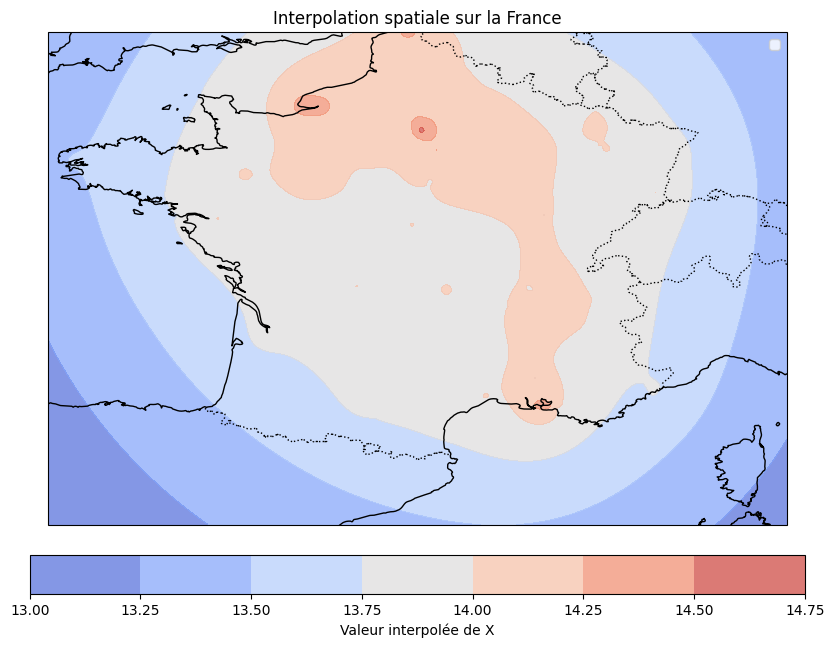

In [160]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern

# Choisir un kernel RBF ou Matern avec un paramètre ajustable
#kernel = RBF(length_scale=l_scale)  # Longueur d'échelle contrôlant la "portée" de la corrélation
kernel = Matern(length_scale=l_scale, nu=0.01)  # Nu contrôle la lissitude

gp = GaussianProcessRegressor(kernel=kernel, alpha=0.01)  # Alpha contrôle le bruit (plus petit = plus rigide)
gp.fit(df[['longitude', 'latitude']], df['X'])

# Prédiction sur la grille
grid_X = gp.predict(grid_points)
grid_X = grid_X.reshape(grid_lon.shape)

## Identique à précédent
# Créer une figure et définir une projection
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Ajouter les frontières, côtes et autres caractéristiques
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Afficher la carte interpolée
cs = ax.contourf(grid_lon, grid_lat, grid_X, cmap='coolwarm', alpha=0.7, transform=ccrs.PlateCarree())

# Ajouter une barre de couleur
cbar = plt.colorbar(cs, ax=ax, orientation='horizontal', pad=0.05, label='Valeur interpolée de X')

# Afficher les points originaux
#ax.scatter(df['longitude'], df['latitude'], c=df['X'], cmap='coolwarm', edgecolor='k', marker='o', s=100, label='Données originales', transform=ccrs.PlateCarree())

# Titre et légende
plt.title("Interpolation spatiale sur la France")
plt.legend()
plt.show()

## Donnée???

In [3]:
pip install pynsee

                                              0.0/9.8 MB ? eta -:--:--
                                              0.0/9.8 MB ? eta -:--:--
                                              0.0/9.8 MB ? eta -:--:--
                                              0.0/9.8 MB ? eta -:--:--
                                              0.0/9.8 MB ? eta -:--:--
                                              0.0/9.8 MB ? eta -:--:--
                                              0.0/9.8 MB ? eta -:--:--
                                              0.0/9.8 MB ? eta -:--:--
                                              0.0/9.8 MB ? eta -:--:--
                                              0.0/9.8 MB ? eta -:--:--
                                              0.0/9.8 MB ? eta -:--:--
                                              0.0/9.8 MB ? eta -:--:--
                                              0.0/9.8 MB ? eta -:--:--
                                              0.0/9.8 MB ? eta -:--:--
      

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from pynsee.geodata import get_geodata_list, get_geodata, GeoFrDataFrame
import geopandas as gpd

# get geographical data list
geodata_list = get_geodata_list()
# get departments geographical limits
com = get_geodata('ADMINEXPRESS-COG-CARTO.LATEST:commune')

mapcom = gpd.GeoDataFrame(com).set_crs("EPSG:3857")

100%|██████████| 99/99 [00:44<00:00,  2.22it/s]


In [ ]:
mapcom.sample(10)

,id,nom,nom_m,insee_com,statut,population,insee_can,insee_arr,insee_dep,insee_reg,siren_epci,geometry,crsCoord
19106,COMMUNE_0000000009760365,Campagnan,CAMPAGNAN,34047,Commune simple,724,09,2,34,76,243400694,"MULTIPOLYGON (((387099.656 5393814.727, 387143...",EPSG:3857
10201,COMMUNE_0000000009759723,Ambres,AMBRES,81011,Commune simple,1036,21,2,81,76,200034023,"MULTIPOLYGON (((208679.449 5421938.721, 208561...",EPSG:3857
4801,COMMUNE_0000000009736207,Vire Normandie,VIRE NORMANDIE,14762,Sous-préfecture,17135,25,4,14,28,200068799,"MULTIPOLYGON (((-89699.873 6244120.278, -89645...",EPSG:3857
7323,COMMUNE_0000000009753644,Saint-Pierre-de-Côle,SAINT-PIERRE-DE-COLE,24485,Commune simple,424,21,2,24,75,242400752,"MULTIPOLYGON (((95561.253 5683567.917, 95566.7...",EPSG:3857
12476,COMMUNE_0000000009743610,Villetrun,VILLETRUN,41291,Commune simple,315,06,2,41,24,200072072,"MULTIPOLYGON (((126817.829 6073083.83, 127142....",EPSG:3857
1184,COMMUNE_0000000009762065,Aussurucq,AUSSURUCQ,64081,Commune simple,236,12,2,64,75,200067106,"MULTIPOLYGON (((-104364.457 5330903.702, -1044...",EPSG:3857
26104,COMMUNE_0000000009730913,Suzanne,SUZANNE,08433,Commune simple,58,01,4,08,44,240800862,"MULTIPOLYGON (((519034.972 6365356.487, 519246...",EPSG:3857
20451,COMMUNE_0000000009745411,Saint-André-en-Morvan,SAINT-ANDRE-EN-MORVAN,58229,Commune simple,310,04,1,58,27,200067890,"MULTIPOLYGON (((428789.096 6012159.176, 428754...",EPSG:3857
4588,COMMUNE_0000000009748613,Chalandray,CHALANDRAY,86050,Commune simple,803,19,3,86,75,200069763,"MULTIPOLYGON (((-7316.033 5880723.941, -7381.7...",EPSG:3857
4207,COMMUNE_0000000009756329,Castelviel,CASTELVIEL,33105,Commune simple,208,27,3,33,75,200069599,"MULTIPOLYGON (((-15049.534 5567401.08, -15166....",EPSG:3857


In [20]:
inventaire_ges.rename(columns={'Commune':'nom_m'}, inplace=True)

In [21]:
inventaire_ges['nom_m']

0        L'ABERGEMENT-CLEMENCIAT
1          L'ABERGEMENT-DE-VAREY
2              AMBERIEU-EN-BUGEY
3            AMBERIEUX-EN-DOMBES
4                        AMBLEON
                  ...           
35793         VILLERS-EN-ARTHIES
35794              VILLIERS-ADAM
35795            VILLIERS-LE-BEL
35796            VILLIERS-LE-SEC
35797        WY-DIT-JOLI-VILLAGE
Name: nom_m, Length: 35798, dtype: object

In [59]:

df_ges_insee = gpd.GeoDataFrame(pd.merge(df_ges_insee,inventaire_ges,how = 'left',on = 'nom_m'),geometry='geometry').set_crs("EPSG:3857")


<Axes: ylabel='Frequency'>

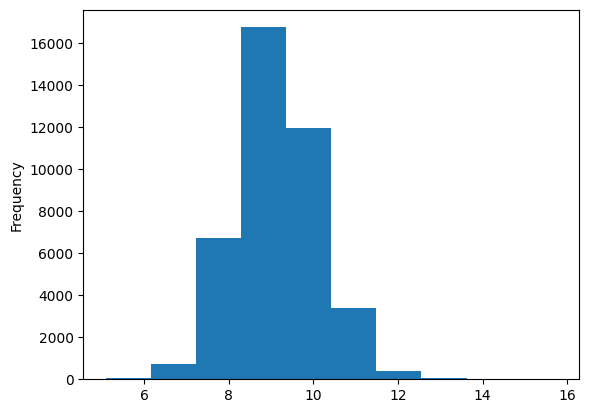

In [50]:
df_ges_insee['log_total'].loc[(df_ges_insee['population']<5000)].plot(kind = 'hist')

In [60]:
from pynsee.geodata import get_geodata_list, get_geodata, GeoFrDataFrame

import math
import geopandas as gpd
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import descartes

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)


df_ges_insee = df_ges_insee.to_crs(epsg=3035)
df_ges_insee["area"] = df_ges_insee['geometry'].area / 10**6
df_ges_insee = df_ges_insee.to_crs(epsg=3857)

df_ges_insee['REF_AREA'] = 'D' + df_ges_insee['insee_dep']
df_ges_insee['density'] = df_ges_insee['population'] / df_ges_insee['area']

KeyboardInterrupt: 

In [ ]:

from pynsee.geodata import get_geodata_list, get_geodata, GeoFrDataFrame

import math
import geopandas as gpd
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import descartes

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

# get geographical data list
geodata_list = get_geodata_list()
# get departments geographical limits


df_ges_insee = gpd.GeoDataFrame(com).set_crs("EPSG:3857")

# area calculations depend on crs which fits metropolitan france but not overseas departements
# figures should not be considered as official statistics
df_ges_insee = df_ges_insee.to_crs(epsg=3035)
df_ges_insee["area"] = df_ges_insee['geometry'].area / 10**6
df_ges_insee = df_ges_insee.to_crs(epsg=3857)

df_ges_insee['REF_AREA'] = 'D' + df_ges_insee['insee_dep']
df_ges_insee['density'] = df_ges_insee['population'] / df_ges_insee['area']

df_ges_insee = GeoFrDataFrame(df_ges_insee)
df_ges_insee = df_ges_insee.translate(departement = ['971', '972', '974', '973', '976'],
                          factor = [1.5, 1.5, 1.5, 0.35, 1.5])
                          
df_ges_insee = df_ges_insee.zoom(departement = ["75","92", "93", "91", "77", "78", "95", "94"],
                 factor=1.5, startAngle = math.pi * (1 - 3 * 1/9))
df_ges_insee

mapplot = gpd.GeoDataFrame(df_ges_insee)
mapplot.loc[mapplot.density_ges < 40, 'range'] = "< 40"
mapplot.loc[mapplot.density_ges >= 20000, 'range'] = "> 20 000"

density_ranges = [40, 80, 100, 120, 150, 200, 250, 400, 600, 1000, 2000, 5000, 10000, 20000]
list_ranges = []
list_ranges.append( "< 40")

for i in range(len(density_ranges)-1):
    min_range = density_ranges[i]
    max_range = density_ranges[i+1]
    range_string = "[{}, {}[".format(min_range, max_range)
    mapplot.loc[(mapplot.density >= min_range) & (mapplot.density < max_range), 'range'] = range_string
    list_ranges.append(range_string)

list_ranges.append("> 20 000")

mapplot['range'] = mapplot['range'].astype(CategoricalDtype(categories=list_ranges, ordered=True))

fig, ax = plt.subplots(1,1,figsize=[15,15])
mapplot.plot(column='range', cmap=cm.viridis,
legend=True, ax=ax,
legend_kwds={'bbox_to_anchor': (1.1, 0.8),
             'title':'density per km2'})
ax.set_axis_off()
ax.set(title='Distribution of population in France')
plt.show()

fig.savefig('pop_france.svg',
            format='svg', dpi=1200,
            bbox_inches = 'tight',
            pad_inches = 0)
 

AttributeError: 'GeoFrDataFrame' object has no attribute 'to_crs'